In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import tushare as ts 
import matplotlib.pyplot as plt  

In [2]:
ts.get_hist_data('600848')

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-06-21,31.49,32.85,31.50,31.28,103720.01,0.39,1.25,30.650,30.387,31.732,72145.96,73043.18,90274.61
2019-06-20,30.79,31.75,31.11,30.41,69023.27,0.31,1.01,30.290,30.203,31.782,60957.16,72129.92,89635.40
2019-06-19,30.90,31.47,30.80,30.47,114712.51,0.99,3.32,30.170,30.100,31.865,62940.96,83881.91,90442.75
2019-06-18,30.08,30.08,29.81,29.35,32152.20,-0.22,-0.73,30.162,30.323,31.975,54878.66,79273.17,90388.73
2019-06-17,29.01,30.28,30.03,28.81,41121.82,0.33,1.11,30.350,30.747,32.066,65203.47,83644.85,93588.79
2019-06-14,30.22,30.80,29.70,29.70,47776.00,-0.81,-2.65,30.124,31.197,32.190,73940.40,91594.33,95825.01
2019-06-13,30.76,30.96,30.51,29.90,78942.27,-0.25,-0.81,30.116,31.627,32.397,83302.67,97666.26,97918.70
2019-06-12,30.70,31.44,30.76,30.08,74401.01,0.01,0.03,30.030,32.049,32.577,104822.86,98967.89,99756.84
2019-06-11,29.00,30.75,30.75,29.00,83776.23,1.85,6.40,30.484,32.443,32.720,103667.67,108688.61,105881.86


In [3]:
np.set_printoptions(threshold=100)
pd.set_option('display.max_rows', 100)

In [4]:
START_DATE='20140531'
END_DATE='20190531'
#上证50成分股列表
SH50_CODE_LIST = ['603993','601989','601988','601881','601878','601857','601818',
              '601800','601766','601688','601668','601628','601601','601398',
              '601390','601360','601336','601328','601318','601288','601229',
              '601211','601186','601169','601166','601088','601006','600999',
              '600958','600887','600703','600690','600606','600585','600547',
              '600519','600340','600309','600276','600111','600104','600050',
              '600048','600036','600030','600029','600028','600019','600016',
              '600000','sz50']

In [5]:
#根据股票代码列表获取股票价格
def get_prices(stock_list,start_date,end_date,price_type):
    price_df = pd.DataFrame()
    
    #逐个获取列表中的股票价格
    for stock_code in stock_list:
        all_price=ts.get_hist_data(stock_code,start=start_date,end=end_date)
       
        price=all_price.loc[:,[price_type]]
        price.columns = [stock_code]
       
        if price_df.empty:
            price_df=price
        else:
            price_df=pd.merge(price_df,price,left_index = True,right_index = True,how = 'outer')
    return price_df

In [6]:
#获取上证50成分股日收盘价的价格
SH50_PRICE_DF = get_prices(SH50_CODE_LIST,START_DATE,END_DATE,'close')
SH50_PRICE_DF

,603993,601989,601988,601881,601878,601857,601818,601800,601766,601688,...,600050,600048,600036,600030,600029,600028,600019,600016,600000,sz50
date,,,,,,,,,,,,,,,,,,,,,
2016-12-21,3.86,7.20,3.46,NaN,NaN,7.93,3.93,14.52,9.99,18.19,...,7.37,9.24,17.81,16.17,7.21,5.56,6.42,9.24,16.32,2297.37
2016-12-22,3.84,7.28,3.45,NaN,NaN,8.16,3.90,14.99,10.02,18.07,...,7.68,9.19,17.72,16.16,7.15,5.64,6.32,9.18,16.19,2292.04
2016-12-23,3.86,7.21,3.43,NaN,NaN,8.12,3.89,15.01,9.90,17.80,...,7.81,9.13,17.60,15.99,7.13,5.64,6.32,9.16,16.19,2278.48
2016-12-26,3.83,7.41,3.44,NaN,NaN,8.10,3.90,16.20,10.01,18.02,...,7.81,9.18,17.75,16.09,7.07,5.67,6.20,9.14,16.25,2294.71
2016-12-27,3.80,7.40,3.41,NaN,NaN,8.02,3.88,16.02,9.93,18.04,...,7.55,9.23,17.71,16.02,7.03,5.56,6.20,9.09,16.14,2286.96
2016-12-28,3.78,7.29,3.42,NaN,NaN,8.03,3.88,15.79,9.78,18.04,...,7.69,9.11,17.62,16.02,6.97,5.55,6.24,9.05,16.09,2277.18
2016-12-29,3.74,7.16,3.42,NaN,NaN,7.95,3.89,15.72,9.82,17.87,...,7.54,9.09,17.49,15.92,6.99,5.41,6.29,9.06,16.07,2275.11
2016-12-30,3.72,7.09,3.44,NaN,NaN,7.95,3.91,15.19,9.77,17.86,...,7.31,9.13,17.60,16.06,7.02,5.41,6.35,9.08,16.21,2286.90
2017-01-03,3.75,7.34,3.47,NaN,NaN,7.97,3.95,15.29,9.84,18.19,...,7.44,9.19,17.96,16.19,7.03,5.51,6.35,9.11,16.30,2307.89


In [7]:
SH50_PRICE_NONA=SH50_PRICE_DF.dropna()

In [8]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [9]:
SH50_PRICE_NONA=SH50_PRICE_NONA.apply(scale_function)

In [10]:
dax = pd.DataFrame(SH50_PRICE_NONA.pop('sz50'))

In [11]:
pca = PCA().fit(SH50_PRICE_NONA)

In [12]:
print(len(pca.explained_variance_))
pca.explained_variance_ratio_[:10]

50


array([0.55702982, 0.17208921, 0.09314384, 0.05521765, 0.02957676,
       0.02372943, 0.01299028, 0.01154785, 0.00714949, 0.00688319])

In [13]:
get_we = lambda x: x / x.sum()
get_we(pca.explained_variance_)[:8].sum()

0.9553248526146697

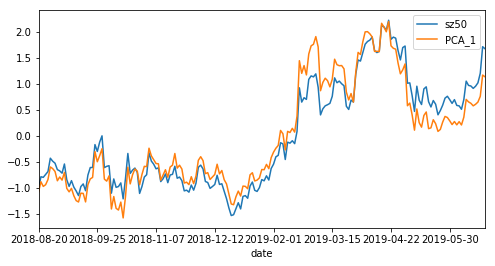

In [14]:
pca = PCA(n_components=1).fit(SH50_PRICE_NONA)
dax['PCA_1'] = pca.transform(SH50_PRICE_NONA)
#dax.apply(scale_function).plot(figsize=(8, 4))
dax=dax.apply(scale_function)
dax.plot(figsize=(8, 4))

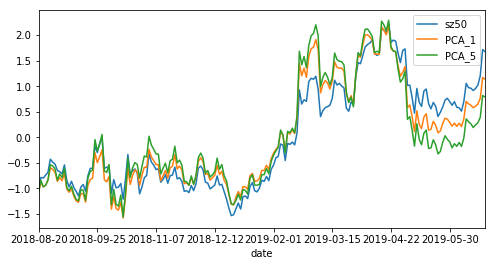

In [21]:
pca = PCA(n_components=5).fit(SH50_PRICE_NONA.apply(scale_function))
pca_components = pca.transform(SH50_PRICE_NONA)
weights = get_we(pca.explained_variance_)
dax['PCA_5'] = np.dot(pca_components, weights)
dax=dax.apply(scale_function)
dax.plot(figsize=(8, 4))

In [16]:
import matplotlib as mpl
SH50_PRICE_NONA.index=pd.to_datetime(SH50_PRICE_NONA.index,format = '%Y-%m-%d')
mpl_dates = mpl.dates.date2num(SH50_PRICE_NONA.index.to_pydatetime())
mpl_dates[:10]

array([736926., 736927., 736928., 736929., 736930., 736933., 736934.,
       736935., 736936., 736937.])

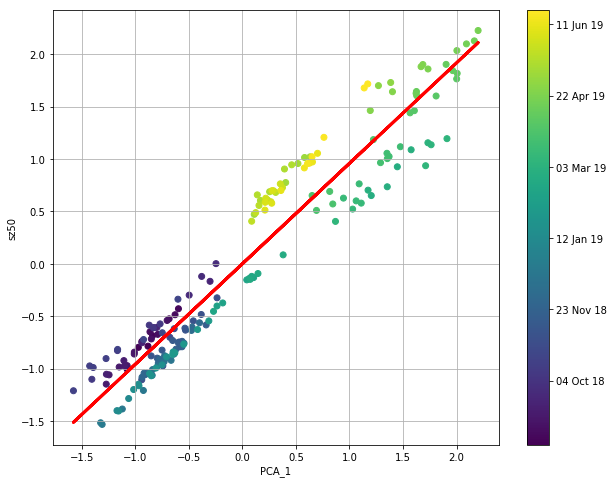

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(dax['PCA_1'], dax['sz50'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_1'],dax['sz50'], 1),dax['PCA_1'])
plt.plot(dax['PCA_1'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_1')
plt.ylabel('sz50')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=50),format=mpl.dates.DateFormatter('%d %b %y'))

Text(0, 0.5, 'diff_1')

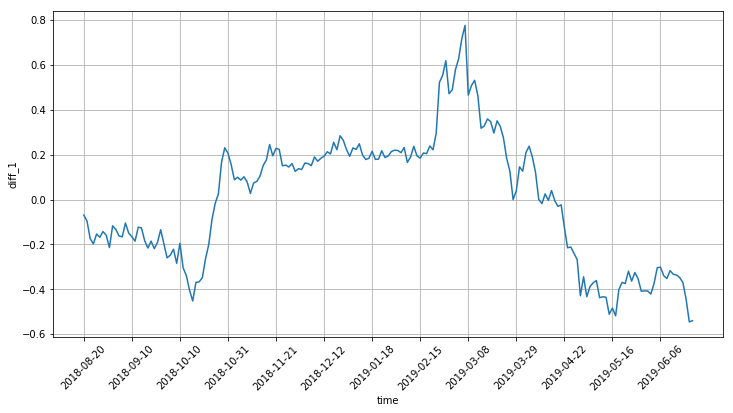

In [46]:
diff_1=dax['PCA_1']-dax['sz50']
plt.figure(figsize=(12, 6))
time=pd.Series(diff_1.index)
plt.xticks(range(0,time.shape[0],15),time.loc[::15],rotation=45)
plt.plot(time,diff_1)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('diff_1')

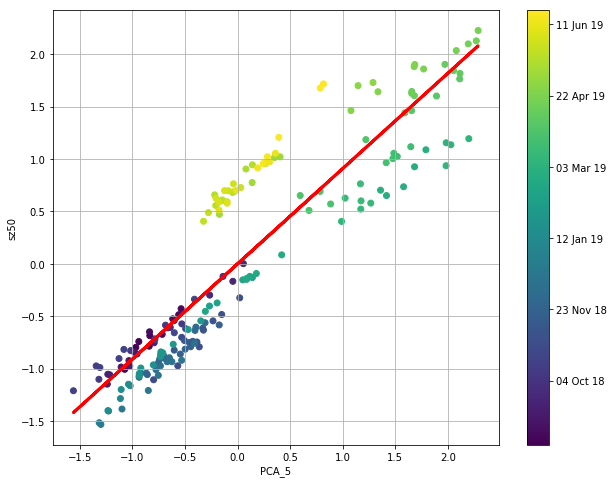

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(dax['PCA_5'], dax['sz50'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],dax['sz50'], 1),dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('sz50')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=50),format=mpl.dates.DateFormatter('%d %b %y'))

Text(0, 0.5, 'diff_5')

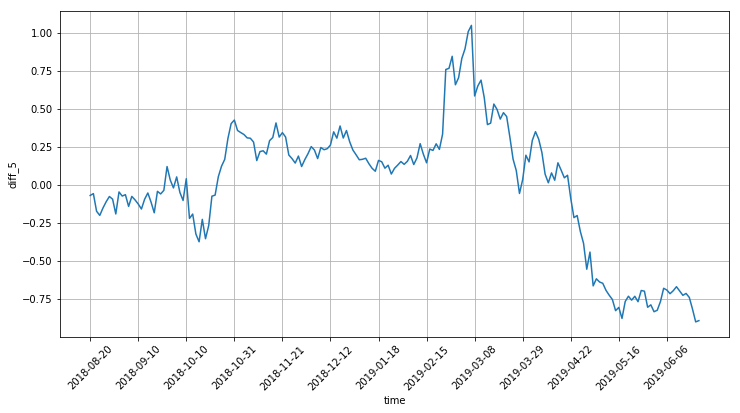

In [49]:
diff_5=dax['PCA_5']-dax['sz50']
plt.figure(figsize=(12, 6))
time=pd.Series(diff_1.index)
plt.xticks(range(0,time.shape[0],15),time.loc[::15],rotation=45)
plt.plot(time,diff_5)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('diff_5')

In [18]:
cut_date = '2019-05-01'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['sz50'][dax.index < cut_date], 1),
                early_pca)

In [19]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['sz50'][dax.index >= cut_date], 1),
                late_pca)

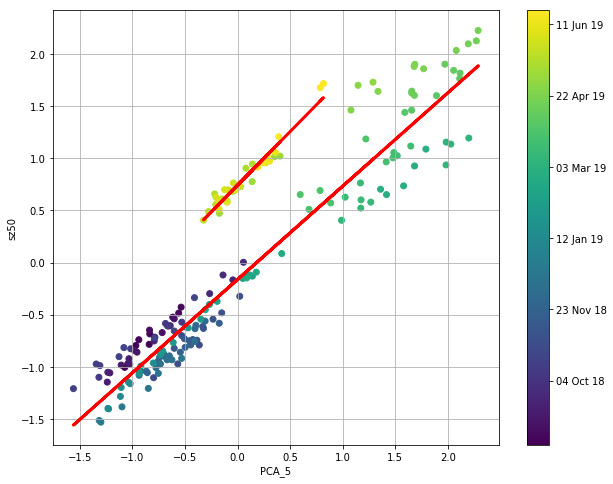

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(dax['PCA_5'], dax['sz50'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('sz50')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=50),format=mpl.dates.DateFormatter('%d %b %y'))